In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path("..").resolve()))


In [8]:
import matplotlib.pyplot as plt
from src.services.book_analytics_service import BookAnalyticsService
from src.repositories.book_repository import BookRepository

repo = BookRepository("../books.json")
books = repo.get_all_books()
analytics = BookAnalyticsService()



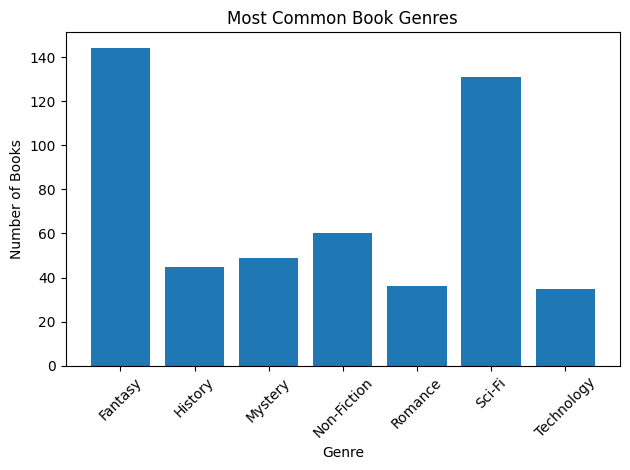

In [10]:
genre_counts = analytics.genre_counts(books)
genres = list(genre_counts.keys())
counts = list(genre_counts.values())
plt.bar(genres, counts)
plt.xlabel("Genre")
plt.ylabel("Number of Books")
plt.title("Most Common Book Genres")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [3]:
import matplotlib.pyplot as plt
from src.services.book_analytics_service import BookAnalyticsService
from src.repositories.book_repository import BookRepository

repo = BookRepository("../books.json")
books = repo.get_all_books()
analytics = BookAnalyticsService()



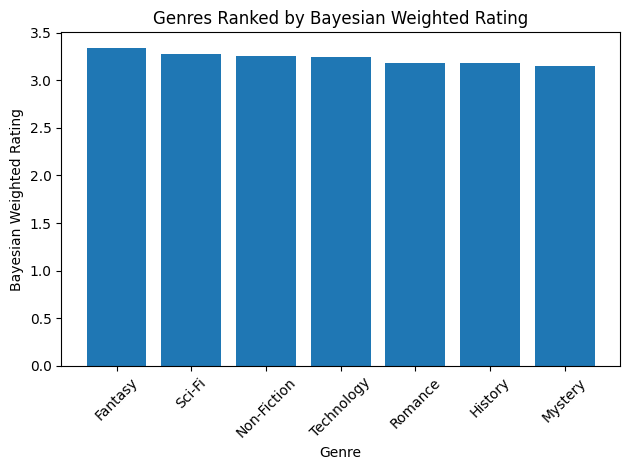

In [10]:
mean_ratings = analytics.mean_rating_by_genre(books)
median_counts = analytics.median_ratings_count_by_genre(books)

all_ratings = [
    b.average_rating
    for b in books
    if b.average_rating is not None
]

if not all_ratings:
    raise ValueError("No valid ratings available to compute global mean")

global_mean = sum(all_ratings) / len(all_ratings)

m = 75
weighted_scores = {}

for genre, mean_rating in mean_ratings.items():
    median_count = median_counts.get(genre, 0)

    weighted_rating = (
        (median_count / (median_count + m)) * mean_rating
        + (m / (median_count + m)) * global_mean
    )

    weighted_scores[genre] = weighted_rating

weighted_scores = dict(
    sorted(weighted_scores.items(), key=lambda x: x[1], reverse=True)
)

genres = list(weighted_scores.keys())
scores = list(weighted_scores.values())

plt.bar(genres, scores)
plt.xlabel("Genre")
plt.ylabel("Bayesian Weighted Rating")
plt.title("Genres Ranked by Bayesian Weighted Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


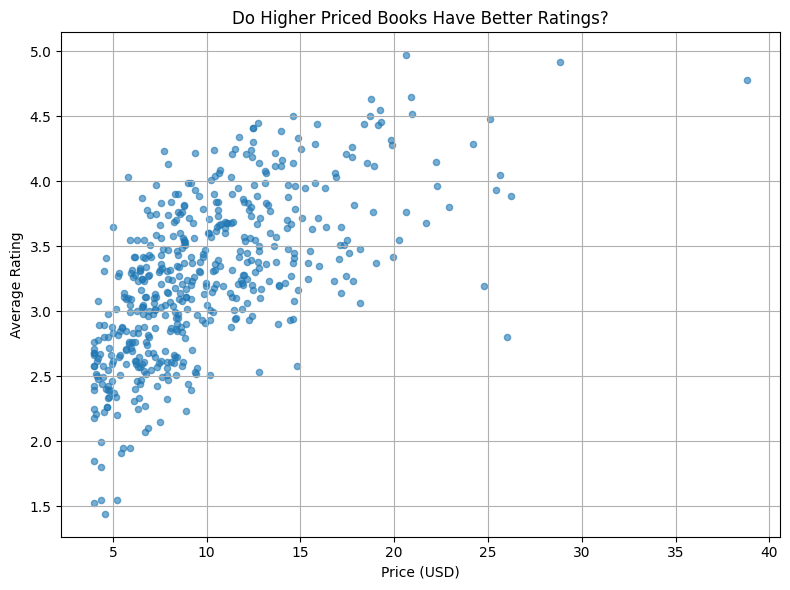

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from src.repositories.book_repository import BookRepository
from src.services.book_analytics_service import BookAnalyticsService

repo = BookRepository("../books.json")
books = repo.get_all_books()

df = pd.DataFrame([{
    'price': b.price_usd,
    'rating': b.average_rating
} for b in books])

df = df.dropna(subset=['price', 'rating'])

plt.figure(figsize=(8,6))
plt.scatter(df['price'], df['rating'], alpha=0.6, s=20)
plt.xlabel("Price (USD)")
plt.ylabel("Average Rating")
plt.title("Do Higher Priced Books Have Better Ratings?")
plt.grid(True)

plt.tight_layout()
plt.show()


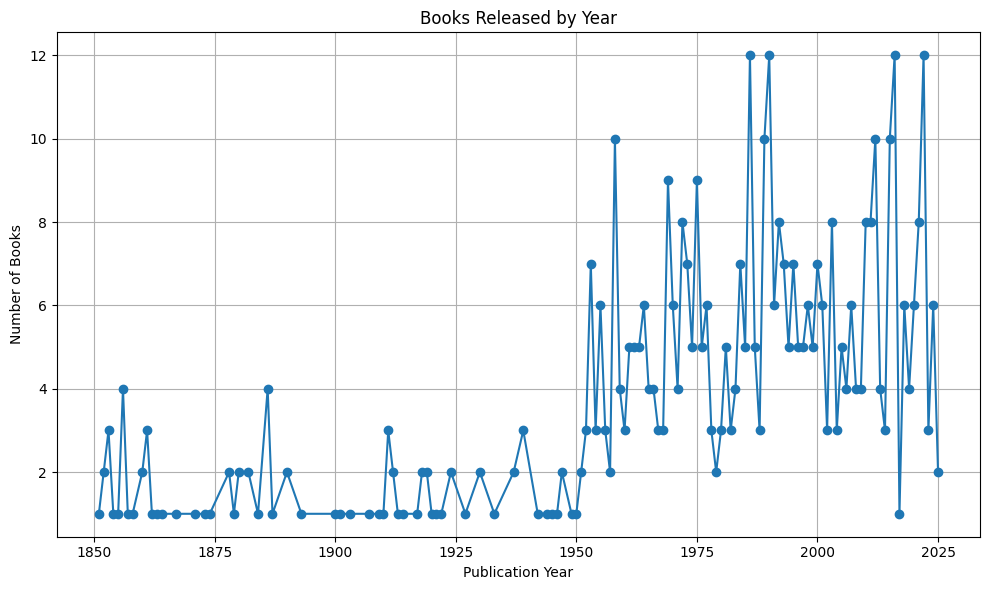

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from src.repositories.book_repository import BookRepository

repo = BookRepository("../books.json")
books = repo.get_all_books()

df = pd.DataFrame([{
    'year': b.publication_year
} for b in books])

books_per_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.plot(books_per_year.index, books_per_year.values, marker='o', linestyle='-')
plt.xlabel("Publication Year")
plt.ylabel("Number of Books")
plt.title("Books Released by Year")
plt.grid(True)
plt.tight_layout()
plt.show()


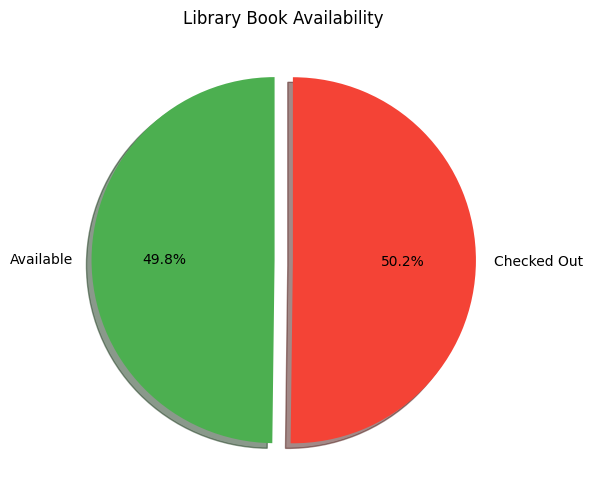

In [9]:
import matplotlib.pyplot as plt
from src.repositories.book_repository import BookRepository

repo = BookRepository("../books.json")
books = repo.get_all_books()

available_count = sum(1 for b in books if b.available)
checked_out_count = len(books) - available_count

labels = ['Available', 'Checked Out']
sizes = [available_count, checked_out_count]
colors = ['#4CAF50', '#F44336'] 
explode = (0.05, 0.05)

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=colors, explode=explode, shadow=True)
plt.title("Library Book Availability")
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import numpy as np
import json


with open("../books_dirty.json", "r", encoding="utf-8") as f:
        data = json.load(f)

for book in data:
        keys = list(book.keys())
        values = np.array(list(book.values()), dtype=object)
        values[values == ""] = np.nan
        book.update(dict(zip(keys, values.tolist())))

df = pd.DataFrame(data)

df["publication_year"] = pd.to_numeric(df["publication_year"], errors="coerce")
df["publication_year"] = df["publication_year"].clip(lower=1800, upper=2026)

df["page_count"] = pd.to_numeric(df["page_count"], errors="coerce")
df = df[df["page_count"] > 0]
df = df[df["average_rating"] != "N/A"]
df["price_usd"] = pd.to_numeric(df["price_usd"], errors="coerce")
df = df[df["price_usd"] >= 0]

df["last_checkout"] = pd.to_datetime(df["last_checkout"], errors="coerce")
df.head(50)



C:\Users\hussa\AppData\Local\Temp\ipykernel_11976\1600937730.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["last_checkout"] = pd.to_datetime(df["last_checkout"], errors="coerce")


,book_id,title,author,genre,publication_year,page_count,average_rating,ratings_count,price_usd,publisher,language,format,in_print,sales_millions,last_checkout,available,publisher_email
33,af86546f-2fd3-495d-b3e1-b1b20956f388,Book Title 18,Author 21,Romance,1807.0,802.0,4.45,Unknown,5.81,Sunshine Media,German,Ebook,None,None,NaT,false,sam_garcia@sunshinemedia.com
68,c4a51508-aea9-4031-b272-94416ecc835e,Book Title 1,Author 22,History,NaN,251.0,None,2959,61.94,Old Tree Publishing,German,Hardcover,true,4.39,NaT,False,info@eu.galacticbooks.org
84,940a0e0f-8ea3-41c3-bbc1-fd730377f50c,Book Title 3,Author 22,Mystery,NaN,976.0,None,4703,0.89,Sunshine Media,German,Hardcover,True,Unknown,NaT,False,hello@galacticbooks5.org
147,0f9fb673-f9d8-4d40-b44c-e2b0f61ae37b,Book Title 20,Author 3,Technology,NaN,536.0,1.96,Unknown,98.78,North Star Press,French,Hardcover,None,Unknown,NaT,True,press.galacticbooks@kr.galacticbooks.io
169,07445460-0d9d-4cbf-a745-74be7aff4ae5,Book Title 2,Author 12,Biography,1920.0,704.0,2.15,Unknown,118.57,Sunshine Media,Eng,Ebook,True,None,NaT,false,chrissmith@galacticbooks.io
188,98ce2893-e9e8-4adb-b154-e39f05774129,Book Title 1,Author 2,Biography,1800.0,978.0,0.21,978,55.28,Galactic Books,Eng,Ebook,true,-1.67,NaT,False,paper18@support.oldtreepublishing.info
228,ac4d5ccb-28aa-453f-a044-7ebb3e80960b,Book Title 12,Author 24,History,1857.0,274.0,None,Unknown,12.41,North Star Press,English,Paperback,None,Unknown,NaT,None,press.sunshinemedia@sunshinemedia.edu
231,84afb526-16d8-4c95-9a4b-ec749419bf83,Book Title 16,Author 17,Mystery,NaN,142.0,3.32,4519,80.07,NaN,English,Audiobook,False,8.83,2023-10-05 15:01:46.315132,True,cwright@oldtreepublishing.alpha.co.uk
247,18e52167-bac2-4208-a11c-1f3fa751058d,Book Title 8,Author 24,Romance,NaN,137.0,None,None,45.17,NaN,French,Hardcover,None,12.33,NaT,False,mx.team@oldtreepublishing.info
249,70dc57ce-a2bb-428e-98bc-2bb79280456c,Book Title 5,Author 16,Fantasy,NaN,537.0,2.87,2449,116.87,North Star Press,German,Audiobook,false,Unknown,2021-07-12 15:01:46.315495,None,support@sunshine.edu


In [5]:
df = pd.read_json("../books_dirty.json")
df = df[df["publisher_email"].str.contains(r"\.com$", na=False)]
df


,book_id,title,author,genre,publication_year,page_count,average_rating,ratings_count,price_usd,publisher,language,format,in_print,sales_millions,last_checkout,available,publisher_email
7,d97c2554-33e1-4686-bc27-5dde8b17887c,Book Title 17,Author 19,History,None,-5,2.36,1474,None,,German,Hardcover,true,-1.28,2025-10-10T15:01:46.309040,None,sunshinemediainfo@sunshinemedia.prime.com
14,dd2348a8-92e1-4ac2-841f-2c331462edcd,Book Title 16,Author 13,Fantasy,1870,None,None,None,N/A,,English,Paperback,None,Unknown,,false,info@northstarpress.com
24,d8756e3f-b5b9-4a15-9ffe-374b55996999,Book Title 7,Author 18,Mystery,None,N/A,None,Unknown,None,,Eng,Audio Book,True,-4.42,2025-04-20T15:01:46.309916,true,hello@shop.northstarpressmedia.com
26,ac8afcf0-96f3-4571-be03-706840dd5d26,Book Title 8,Author 7,Mystery,None,None,1.11,None,172.92,Old Tree Publishing,French,Hardcover,true,9.84,2022-11-24T15:01:46.309987,true,krwright@mx.oldtreepublishing.com
33,af86546f-2fd3-495d-b3e1-b1b20956f388,Book Title 18,Author 21,Romance,1807,802,4.45,Unknown,5.81,Sunshine Media,German,Ebook,None,None,N/A,false,sam_garcia@sunshinemedia.com
40,d2ba3d8e-27fc-4687-84ea-2b2cc0dff23c,Book Title 7,Author 6,Fantasy,None,None,3.11,None,N/A,Sunshine Media,French,Hardcover,None,None,N/A,true,oldtreepublishing@oldtreepublishing.com
123,b0f03380-e728-4be6-ba39-2acb40fae28c,Book Title 14,Author 13,Biography,1842,603,None,Unknown,N/A,North Star Press,Spanish,Audio Book,true,2.16,NaN,False,john.wright@support.sunshinemedia.node.com
157,a9832764-c2a5-4870-a42e-a359dd090a16,Book Title 8,Author 8,Biography,1932,N/A,N/A,1105,60.94,,Spanish,Ebook,false,1.05,,None,alpha31@shop.galacticbooks.com
223,bd7938ca-069b-440c-9863-6a9603fcfaae,Book Title 10,Author 14,History,1904,None,1.94,4014,N/A,North Star Press,French,Ebook,True,Unknown,NaN,None,galacticbooks@mx.galacticbooksmedia.com
277,66f4696f-48ca-4875-ac68-7d9083345555,Book Title 7,Author 4,Biography,None,N/A,None,None,None,Galactic Books,German,Audio Book,true,Unknown,N/A,True,jane.smith@shop.northstarpress.com
